In [1]:
# 1-1. 데이터 가져오기 

import pandas as pd 
import matplotlib.pyplot as plt 


socar = pd.read_csv('../../0. raw_data/insurance_fraud_detect_data.csv')
socar 

,fraud_YN,car_model,sharing_type,age_group,has_previous_accident,cumulative_use_count,b2b,accident_ratio,pf_type,socarpass,...,insure_cost,accident_location,car_part1,car_part2,repair_cnt,acc_type1,insurance_site_aid_YN,police_site_aid_YN,total_prsn_cnt,test_set
0,0,2,1,3,0,2,0,100,2,0,...,0,1,0,0,1,0,0,0,-1,0
1,0,1,0,4,0,4,0,0,3,1,...,0,1,1,1,2,1,1,1,0,1
2,0,1,0,4,1,4,0,100,3,1,...,12925040,3,1,0,2,1,1,1,0,1
3,0,3,1,3,0,4,0,0,2,0,...,0,3,1,0,1,0,0,0,-1,0
4,0,1,0,1,0,1,0,100,1,0,...,1209410,1,0,0,2,0,0,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0,2,0,2,0,2,0,100,2,0,...,0,1,1,0,1,0,0,0,-1,0
15996,0,2,0,2,1,4,0,100,1,1,...,0,2,1,0,1,0,0,0,-1,0
15997,0,2,1,2,0,4,0,100,1,0,...,0,0,0,0,1,0,0,0,-1,1
15998,0,2,0,2,0,2,0,100,2,0,...,0,4,1,0,1,0,0,0,-1,0


<Figure size 432x288 with 0 Axes>

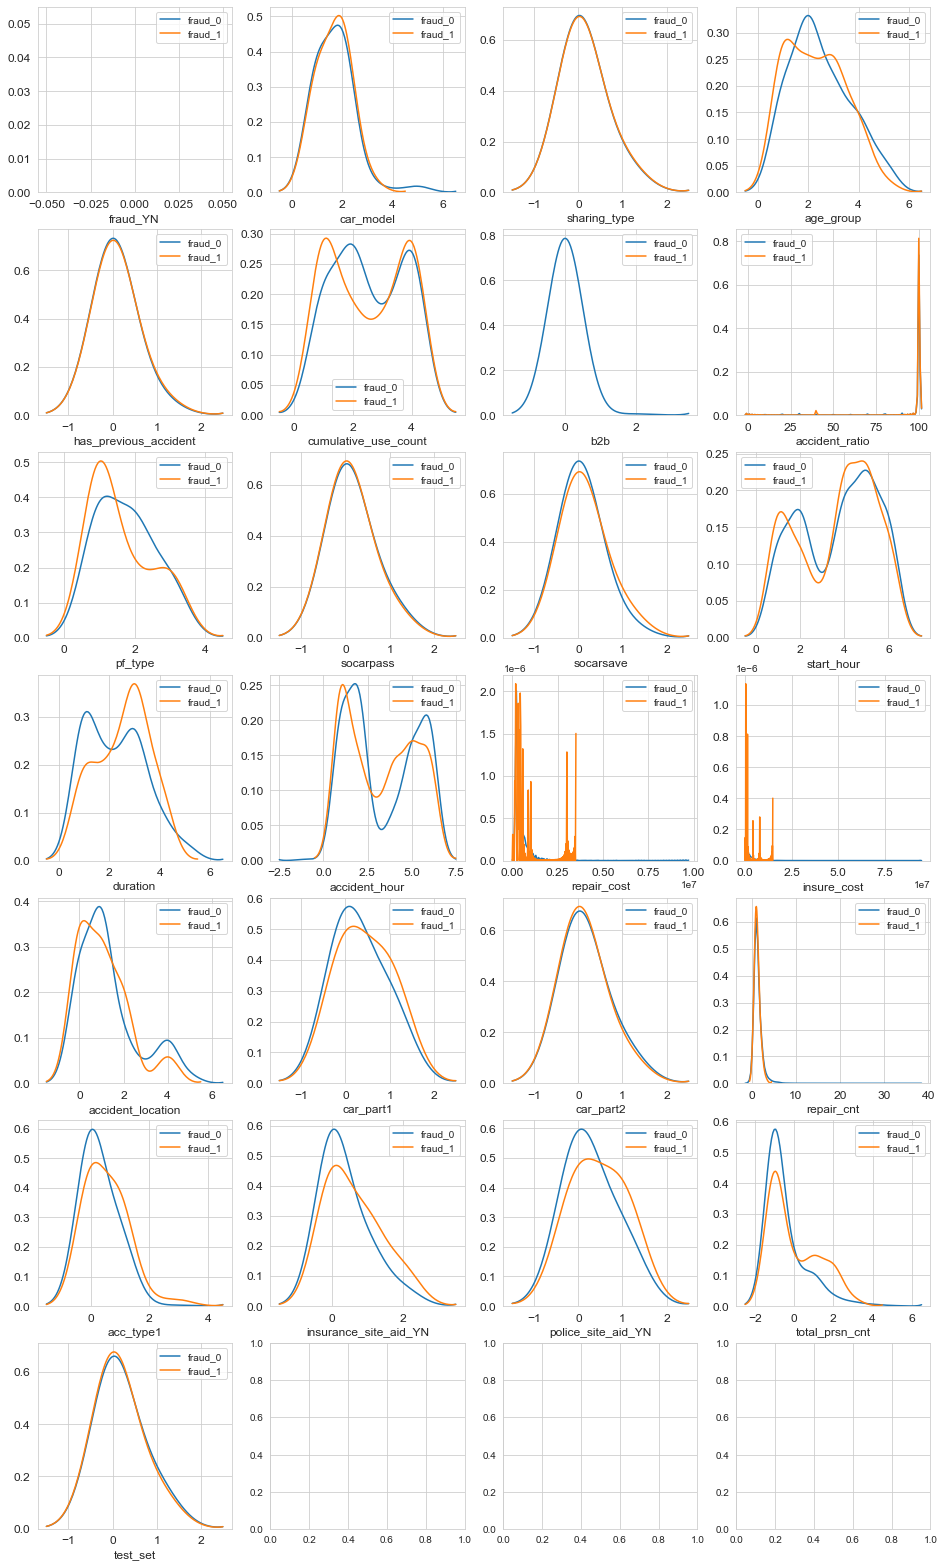

In [2]:
# 컬럼별 분포 확인 

import seaborn as sns 

var = socar.columns.values 
i=0 

t0 = socar.loc[socar['fraud_YN']==0]
t1 = socar.loc[socar['fraud_YN']==1]

sns.set_style('whitegrid')
plt.figure()
fig,ax = plt.subplots(7,4,figsize=(16,28))

for feature in var:
    i += 1 
    plt.subplot(7,4,i)
    sns.kdeplot(t0[feature], bw = 0.5, label='fraud_0')
    sns.kdeplot(t1[feature], bw = 0.5, label = 'fraud_1')
    plt.xlabel(feature, fontsize=12)
    locs, labels =plt.xticks()

    plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()

Index(['fraud_YN', 'car_model', 'sharing_type', 'age_group',
       'has_previous_accident', 'cumulative_use_count', 'b2b',
       'accident_ratio', 'pf_type', 'socarpass', 'socarsave', 'start_hour',
       'duration', 'accident_hour', 'repair_cost', 'insure_cost',
       'accident_location', 'car_part1', 'car_part2', 'repair_cnt',
       'acc_type1', 'insurance_site_aid_YN', 'police_site_aid_YN',
       'total_prsn_cnt', 'test_set'],
      dtype='object')

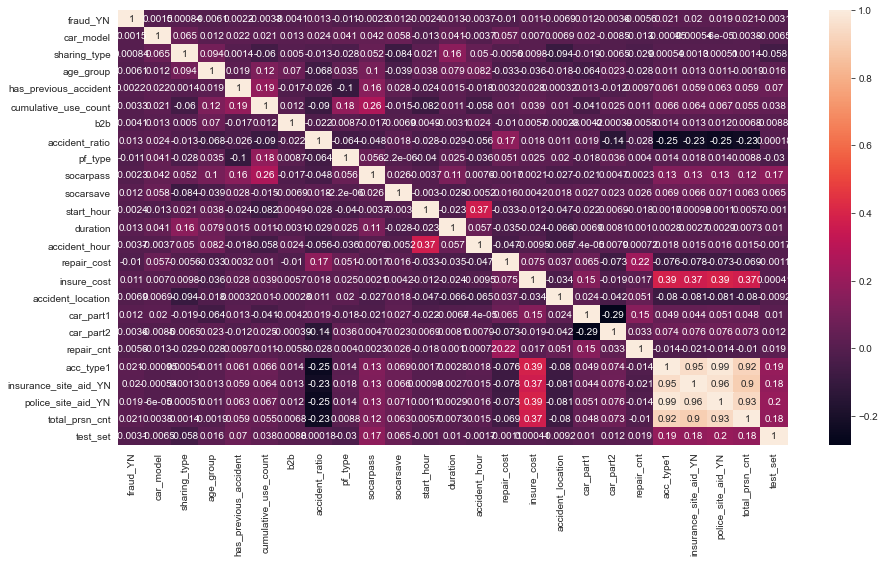

In [3]:
corr = socar.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
socar.columns

# 각 컬럼별 barplot fraud 데이터 살피기 

<AxesSubplot:xlabel='cumulative_use_count', ylabel='count'>

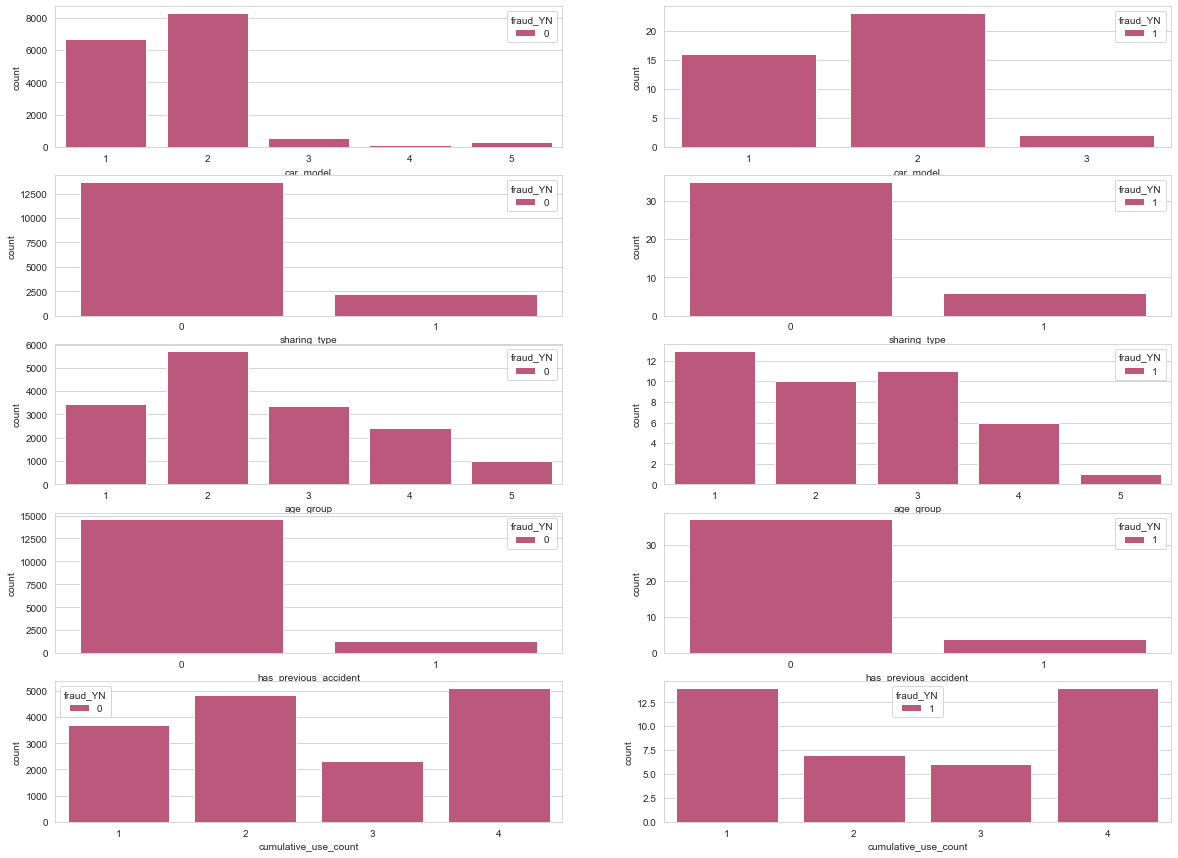

In [44]:
# 차종 
figure, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10)) = plt.subplots(nrows=5, ncols=2)
figure.set_size_inches(20,15)

# ------차종------
sns.countplot(data = socar[socar['fraud_YN']==0],x='car_model',palette='plasma',hue='fraud_YN', ax=ax1)
sns.countplot(data = socar[socar['fraud_YN']==1],x='car_model',palette='plasma',hue='fraud_YN', ax=ax2)
# 1 : '경형','소형','소형SUV'
# 2: '준중형','준중형SUV','중형'
# 3: '대형','승합','준대형','중형SUV'
# 4: '수입'
# 5: 'EV','RV'
# ------부름/타다------
sns.countplot(data = socar[socar['fraud_YN']==0],x='sharing_type',palette='plasma',hue='fraud_YN', ax=ax3)
sns.countplot(data = socar[socar['fraud_YN']==1],x='sharing_type',palette='plasma',hue='fraud_YN', ax=ax4)
# ------연령별------
sns.countplot(data = socar[socar['fraud_YN']==0],x='age_group',palette='plasma',hue='fraud_YN', ax=ax5)
sns.countplot(data = socar[socar['fraud_YN']==1],x='age_group',palette='plasma',hue='fraud_YN', ax=ax6)
# 1: 21
# 2: 23
# 3: 27
# 4: 31 
# 5: 41
# ------누적 사고 유무------
sns.countplot(data = socar[socar['fraud_YN']==0],x='has_previous_accident',palette='plasma',hue='fraud_YN', ax=ax7)
sns.countplot(data = socar[socar['fraud_YN']==1],x='has_previous_accident',palette='plasma',hue='fraud_YN', ax=ax8)

# ------누적 대여 횟수------
sns.countplot(data = socar[socar['fraud_YN']==0],x='cumulative_use_count',palette='plasma',hue='fraud_YN', ax=ax9)
sns.countplot(data = socar[socar['fraud_YN']==1],x='cumulative_use_count',palette='plasma',hue='fraud_YN', ax=ax10)

## review
- 사고를 예상하기 때문에 중소형보다는 대형 또는 SUV 를 선택하는 Fraud 
-  20대 초초반에서 fraud 
-  사용 이력도 주목할 만함  
- 쏘카를 자주 사용했거나 처음이거나 
- 부름서비스나 누적사고유무에 대해서는 크게 다르지 않음 > 컬럼 삭제 시도해볼만 